In [1]:
import tensorflow as tf 
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import Common_Functions as cf 
from mpl_toolkits import mplot3d


In [2]:
df_pions = np.array(pd.read_csv('/home/sean/Documents/Work/Level 4/Level-4-Masters-Project/Djuna_Data_Generation_Notebook/noshift1.csv',header = None))



In [3]:
train_x, train_y = cf.data_normaliser(df_pions[:-1000,:8]), df_pions[:-1000,-1]
val_x, val_y = cf.data_normaliser(df_pions[-1000:,:8]), df_pions[-1000:,-1]

In [4]:
opt = keras.optimizers.Adam(learning_rate= 0.005, beta_1 = 0.7, beta_2= 0.99)
inital_test = cf.trained_network(train_x[:100],train_y[:100],val_x,val_y,[16,16], optimizer= opt, verbose= 0).history


2021-11-04 09:20:25.412579: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-11-04 09:20:25.413018: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-11-04 09:20:25.435990: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-04 09:20:25.436228: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:2b:00.0 name: NVIDIA GeForce GTX 970 computeCapability: 5.2
coreClock: 1.253GHz coreCount: 13 deviceMemorySize: 3.93GiB deviceMemoryBandwidth: 208.91GiB/s
2021-11-04 09:20:25.436240: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2021-11-04 09:20:25.437192: I tensorflow/stream_executor/platform/def

I think I want a b1,b2 array at which I evaluate the minimum point for all of these I think again this should be a mean from 10

In [5]:

def adam_tester(num_beta_1D,repeats,section = 100):
    beta_range = np.linspace(0.5,1,num_beta_1D)
    mae_min = np.zeros((num_beta_1D,num_beta_1D,repeats))
    a = 0
    for i in range(num_beta_1D):
        for j in range(num_beta_1D):
            a += 1
            print('#',a)
            opt = keras.optimizers.Adam(learning_rate= 0.005, beta_1 = beta_range[i], beta_2= beta_range[j])
            for k in range(repeats):
                mae_min[i,j,k] = np.min(cf.trained_network(train_x[:section],train_y[:section],val_x,val_y,[16,16], optimizer= opt, verbose= 0).history['mean_absolute_percentage_error'])
    return mae_min, beta_range



In [6]:
a_test = adam_tester(10,10)

# 1
# 2
# 3
# 4
# 5
# 6
# 7
# 8
# 9
# 10
# 11
# 12
# 13
# 14
# 15
# 16
# 17
# 18
# 19
# 20
# 21
# 22
# 23
# 24
# 25
# 26
# 27
# 28
# 29
# 30
# 31
# 32
# 33
# 34
# 35
# 36
# 37
# 38
# 39
# 40
# 41
# 42
# 43
# 44
# 45
# 46
# 47
# 48
# 49
# 50
# 51
# 52
# 53
# 54
# 55
# 56
# 57
# 58
# 59
# 60
# 61
# 62
# 63
# 64
# 65
# 66
# 67
# 68
# 69
# 70
# 71
# 72
# 73
# 74
# 75
# 76
# 77
# 78
# 79
# 80
# 81
# 82
# 83
# 84
# 85
# 86
# 87
# 88
# 89
# 90
# 91
# 92
# 93
# 94
# 95
# 96
# 97
# 98
# 99
# 100


In [12]:
min_mae , b_range = a_test
min_mae_2d = min_mae.reshape(min_mae.shape[0],-1)

(10, 10, 10)


In [13]:
np.savetxt('adam_beta_test.csv',min_mae_2d,delimiter=',')

In [5]:
loaded_reshape = np.loadtxt('adam_beta_test.csv',delimiter= ',')
loaded_mae_min = loaded_reshape.reshape(10,100//10,10)

In [6]:
print(loaded_mae_min.shape)
if np.isclose(min_mae,loaded_mae_min).all:
    print('fuck yes')
else: 
    print('dum cunt ')

(10, 10, 10)


NameError: name 'min_mae' is not defined

In [14]:
mean_mae_min = np.nan_to_num(np.mean(loaded_mae_min,axis = 2),nan = 5)
beta_range = np.linspace(0.5,1,10)

In [17]:
mean_mae_min[np.where(mean_mae_min>5)] = 5 

Text(0.5, 0, 'Mean Minimum MAPE')

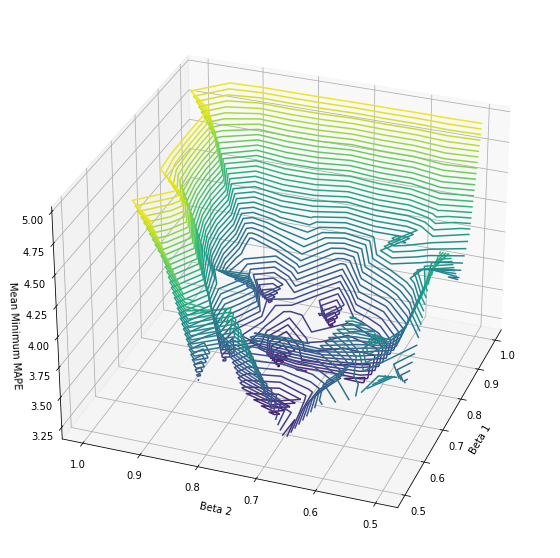

In [52]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.contour3D(beta_range, beta_range, mean_mae_min , 50 ,cmap = 'viridis')
ax.view_init(30,200)
ax.set_xlabel('Beta 1')
ax.set_ylabel('Beta 2')
ax.set_zlabel('Mean Minimum MAPE')

In [53]:
fig.savefig('../Figures/Adam_Beta_parameters_contour_plot.png',dpi = 300)